In [1]:
import sys
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ddpg import DDPGagent
from utils import *
from environment import MyEnv
from OUNoise import OUNoise

rating = pd.read_csv('dataset/Data_Acc_Item.csv')
item = pd.read_csv('dataset/Item_inf.csv',index_col = 'Unnamed: 0')
user = pd.read_csv('dataset/train_acc_inf.csv')
env = MyEnv(rating,item,user)
agent = DDPGagent(env)
noise = OUNoise(env.action_space)
batch_size = 100
rewards = []
avg_rewards = []

for episode in range(20):
    state = env.get_observation(reset = True)
    noise.reset()
    episode_reward = 0
    
    for step in range(500):
        action = agent.get_action(state)
        action = noise.get_action(action, step)
        action = agent.from_probability_distribution_to_action(action)
        new_state, reward, done, _ = env.step(action) 
        agent.memory.push(state, action, reward, new_state, done)
        
        if len(agent.memory) > batch_size:
            agent.update(batch_size)        
        
        state = env.get_observation()
        episode_reward += reward
        print('step {} in episode {} : reward is {}'.format(step, episode, reward))

    rewards.append(episode_reward)
    avg_rewards.append(np.mean(rewards[-10:]))

plt.plot(rewards)
plt.plot(avg_rewards)
plt.plot()
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

Actor(
  (LSTM): LSTM(576, 576, batch_first=True)
  (hidden_layer): Sequential(
    (0): Linear(in_features=576, out_features=576, bias=True)
    (1): ReLU()
    (2): Linear(in_features=576, out_features=576, bias=True)
    (3): ReLU()
    (4): Linear(in_features=576, out_features=576, bias=True)
    (5): ReLU()
    (6): Linear(in_features=576, out_features=576, bias=True)
    (7): ReLU()
  )
  (score_layer): Linear(in_features=576, out_features=1728, bias=True)
  (Activation): Softmax(dim=-1)
) Critic(
  (encode_state): LSTM(576, 576, batch_first=True)
  (hidden_layer): Sequential(
    (0): Linear(in_features=2304, out_features=576, bias=True)
    (1): ReLU()
    (2): Linear(in_features=576, out_features=576, bias=True)
    (3): ReLU()
    (4): Linear(in_features=576, out_features=576, bias=True)
    (5): ReLU()
    (6): Linear(in_features=576, out_features=576, bias=True)
    (7): ReLU()
  )
  (output_layer): Linear(in_features=576, out_features=1, bias=True)
)
step 0 in episode 0 : 

step 204 in episode 0 : reward is 0
step 205 in episode 0 : reward is 0
step 206 in episode 0 : reward is 0
step 207 in episode 0 : reward is 2
step 208 in episode 0 : reward is 0
step 209 in episode 0 : reward is 0
step 210 in episode 0 : reward is 0
step 211 in episode 0 : reward is 2
step 212 in episode 0 : reward is 0
step 213 in episode 0 : reward is 0
step 214 in episode 0 : reward is 0
step 215 in episode 0 : reward is 0
step 216 in episode 0 : reward is 0
step 217 in episode 0 : reward is 0
step 218 in episode 0 : reward is 0
step 219 in episode 0 : reward is 0
step 220 in episode 0 : reward is 0
step 221 in episode 0 : reward is 0
step 222 in episode 0 : reward is 0
step 223 in episode 0 : reward is 0
step 224 in episode 0 : reward is 0
step 225 in episode 0 : reward is 0
step 226 in episode 0 : reward is 0
step 227 in episode 0 : reward is 0
step 228 in episode 0 : reward is 0
step 229 in episode 0 : reward is 0
step 230 in episode 0 : reward is 0
step 231 in episode 0 : rewa

step 432 in episode 0 : reward is 0
step 433 in episode 0 : reward is 0
step 434 in episode 0 : reward is 0
step 435 in episode 0 : reward is 0
step 436 in episode 0 : reward is 0
step 437 in episode 0 : reward is 0
step 438 in episode 0 : reward is 0
step 439 in episode 0 : reward is 0
step 440 in episode 0 : reward is 0
step 441 in episode 0 : reward is 0
step 442 in episode 0 : reward is 0
step 443 in episode 0 : reward is 0
step 444 in episode 0 : reward is 0
step 445 in episode 0 : reward is 0
step 446 in episode 0 : reward is 0
step 447 in episode 0 : reward is 0
step 448 in episode 0 : reward is 0
step 449 in episode 0 : reward is 0
step 450 in episode 0 : reward is 0
step 451 in episode 0 : reward is 0
step 452 in episode 0 : reward is 0
step 453 in episode 0 : reward is 0
step 454 in episode 0 : reward is 0
step 455 in episode 0 : reward is 0
step 456 in episode 0 : reward is 0
step 457 in episode 0 : reward is 0
step 458 in episode 0 : reward is 0
step 459 in episode 0 : rewa

KeyboardInterrupt: 

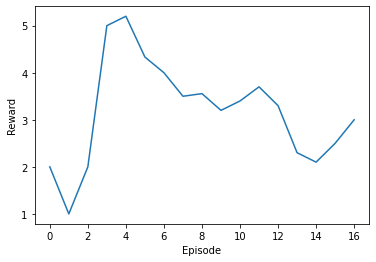

In [6]:
plt.plot(rewards)
plt.plot(avg_rewards)
plt.plot()
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

In [2]:
agent.save_()

In [3]:
states, actions, rewards, next_states, _ = agent.memory.sample(10)

In [7]:
env.encode.inverse_transform(states[0])

array([['IID257'],
       ['IID302'],
       ['IID302'],
       ['IID302'],
       ['IID302'],
       ['IID302'],
       ['IID302']], dtype='<U9')

In [8]:
env.encode.inverse_transform(next_states[0])

array([['IID302'],
       ['IID302'],
       ['IID302'],
       ['IID302'],
       ['IID302'],
       ['IID302'],
       ['IID302']], dtype='<U9')

In [10]:
rewards[0]

array([0])

In [14]:
env.encode.inverse_transform(agent.from_probability_distribution_to_action(agent.actor(states[0]).detach()))

array([['IID120'],
       ['IID122'],
       ['IID155']], dtype='<U9')